# Coral Conundrum

Coral reef fish are colorful and diverse species that live in and around coral reefs, playing important roles in keeping these ecosystems healthy.

Why did the word usage frequency of most `coral reef fish` species drop sharply around `1998`? 

Could it be linked to the UN's designation of 1998 as the `International Year of the Ocean`, a major coral bleaching event, or the internet's rapid growth after Google's launch?

This project will explore various factors that might explain this decline in word frequency, encouraging you to discover potential explanations we haven't yet considered.

In [106]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload:
#  'animal-word-trends-coral-conundrum.csv'
#  'bleaching-reefs.csv'
#  'global-coral-cover.csv'
#  'new-scuba-certifications.csv'
#  'reef-fish-identification-book.csv'

# from google.colab import files
# uploaded = files.upload()

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-word-trends-coral-conundrum.csv')
df

,year,word,frequency
0,1900,angelfish,0.003158
1,1900,bannerfish,0.000015
2,1900,blenny,0.052464
3,1900,butterflyfish,0.000232
4,1900,damselfish,0.000000
...,...,...,...
3128,2019,surgeonfish,0.013411
3129,2019,triggerfish,0.021962
3130,2019,trumpetfish,0.002598
3131,2019,unicornfish,0.001246


### Exploring Word Trends for Coral Reef Fish

We have provided a function to plot the word usage for different coral reef fish. Create different plots. What trends do you observe?

In [108]:
word_list = df['word'].unique()
word_list

array(['angelfish', 'bannerfish', 'blenny', 'butterflyfish', 'damselfish',
       'filefish', 'frogfish', 'goatfish', 'lionfish', 'lizardfish',
       'needlefish', 'parrotfish', 'pipefish', 'porcupinefish',
       'rabbitfish', 'scorpionfish', 'sharksucker', 'soldierfish',
       'squirrelfish', 'surgeonfish', 'triggerfish', 'trumpetfish',
       'wrasse', 'hawkfish', 'cornetfish', 'unicornfish', 'anemonefish'],
      dtype=object)

In [109]:
def plot_word_trend( animal ):
    trend = df.query('word == @animal')
    plt.figure(figsize=(5, 3))
    plt.plot(trend['year'], trend['frequency'], label=animal)
    plt.ylabel('Frequency per million')
    plt.title(f"'{animal}' and the year 1998")
    plt.axvline(1998, color='orange', ls='--')

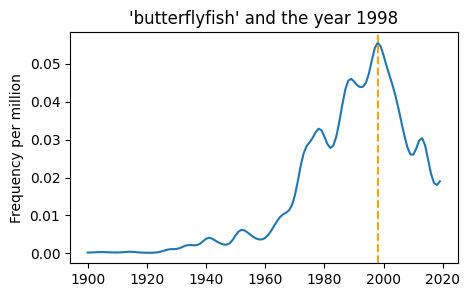

In [ ]:
plot_word_trend('butterflyfish')
# try 'butterflyfish', 'parrotfish', 'anemonefish', 'triggerfish', ...

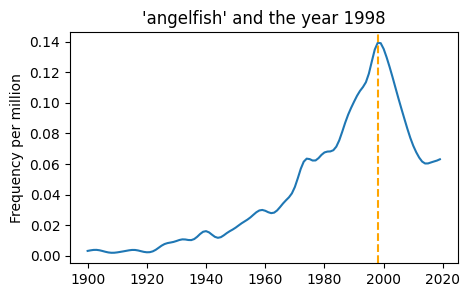

In [111]:
plot_word_trend(word_list[0])
# try word_list[1], word_list[2], word_list[3], ...

### Possible Explanatory Mechanism 1: Coral Bleaching

Coral bleaching occurs when coral reefs lose their vibrant colors and turn white, primarily from warm ocean temperatures. This stress causes corals to expel the essential algae, zooxanthellae, which provide them with food and color. Prolonged warm conditions can lead to coral starvation and death.

Researchers studied coral bleaching events at 100 locations across 54 countries from 1980 to 2016. The file `bleaching-reefs.csv` documents these events. Bleaching is classified as severe (`S`) if over 30% of coral colonies are affected across large areas and moderate (`M`) if 1-30% of colonies are affected at multiple sites at that location.

In [112]:
bleaching_reefs = pd.read_csv('bleaching-reefs.csv')
bleaching_reefs

,location,year,severity
0,"Australia, Coral Sea Northern",1998,S
1,"Australia, Coral Sea Northern",2002,S
2,"Australia, Coral Sea Northern",2004,M
3,"Australia, Coral Sea Northern",2016,S
4,"Australia, Coral Sea Southern",2016,M
...,...,...,...
604,Venezuela,1995,M
605,Venezuela,1998,M
606,Venezuela,2005,M
607,Venezuela,2006,M


#### Ideas

- Use `df.groupby()` to count how many locations experienced coral bleaching each year.

- Create a bar chart to show the total number of bleaching events per year.

- Use `df.query()` and `df.groupby()` to make another bar chart displaying the number of `severe` bleaching events each year.

#### Observations and Questions

- What do you notice about the data? How might coral bleaching be related to the decrease in word frequency for these fish species?


#### Additional Datasets

- **Coral Cover Data:** The dataset from  `global-coral-cover.csv` shows the average percentage of coral reefs covered by live coral each year. A healhty reef has more live coral, as opposed to substrates such as sand, dead coral, and algae.

- **SCUBA Certifications**: The dataset from  `new-scuba-certifications.csv` shows how many people get SCUBA certified each year. This certification is a prerequisite for dive tours. 

In [113]:
coral_cover = pd.read_csv('global-coral-cover.csv')
coral_cover.head(2)

,year,percent_coral
0,1978,32.34
1,1979,32.30


In [114]:
scuba = pd.read_csv('new-scuba-certifications.csv')
scuba.head(2)

,year,num_new_certifications
0,1967,3226
1,1968,8442


### Possible Explanatory Mechanism 2: The Internet Effect

Google was founded in 1998, which may have led to fewer fish identification books being published as more information became available online. FishBase, launched in 1998, is one example of such a resource.

Other relevent websites include:

| Year | Website                     |
|------|-----------------------------|
| 1998 | http://fishbase.org/        |
| 1997 | http://bms.bc.ca/           |
| 1998 | http://aquariumfish.com/    |
| 1996 | http://scubadiving.com/     |
| 1999 | http://saltaquarium.com/    |
| 1998 | http://marinefish.net/      |
| 1999 | http://saltwaterfish.com/   |
| 1998 | http://ncaquariums.com/     |
| 1997 | http://seattleaquarium.org/ |
| 1998 | http://londonaquarium.co.uk/|
| 1999 | http://newportaquarium.com/ |

The book "Reef Fish Identification, Tropical Pacific" is a well-known guide for identifying coral reef fish.

The file `reef-fish-identification-book.csv` lists the number of species covered in the book for each type of fish. For instance, it includes identification details for 49 species of angelfish.

In [115]:
fish_id = pd.read_csv('reef-fish-identification-book.csv')
fish_id.head()

,word,num_species_in_book
0,anemonefish,20
1,angelfish,49
2,bannerfish,7
3,blenny,64
4,butterflyfish,63


#### Ideas

- Use `df.query()` to determine the `frequency per million` of each fish name in `1998`.

- Merge these results with the identification guide dataset (`fish_id`).

- Build a linear model to examine the relationship between the `number of species` listed in the book and the `frequency per million` of each fish name.

- Create a scatter plot with a best-fit line and evaluate the goodness of fit.

#### Questions to Consider
- What patterns emerge from the data? 

- Does the analysis suggest that fish identification guides have historically influenced the fish name’s frequency in written records? 

- If printed fish identification guides became less popular with the rise of the internet, how might the frequency of coral reef fish names in literature change?






In [116]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):


### Possible Explanatory Mechanism 3: Your Awesome Idea!

In [117]:
# YOUR CODE HERE (add additional cells as needed)